# **NLP_&_INSURANCE: TEXT_ANALYSIS**

![](https://miro.medium.com/max/3310/1*2uLP1885m7LG9f638JlLGQ.png)

## Import Libraries

In [1]:
#setup deterministic results 
import numpy as np
from numpy.random import seed
seed=0
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import os
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import re
import string
#import langdetect 
#import ktrain
#from ktrain import text
import spacy
import gensim
from gensim.models import Word2Vec 
import gensim.downloader as gensim_api
#from bertopic import BERTopic

## Requirements

In [2]:
print(np.__version__) 

1.21.6


In [3]:
print(pd.__version__) 

1.3.5


In [4]:
print(sklearn.__version__)

1.0.2


In [5]:
print(sns.__version__)

0.11.2


In [6]:
print(tf.__version__)

2.8.2


In [7]:
print(spacy.__version__)

3.3.1


In [8]:
print(gensim.__version__)

3.6.0


## Upload dataset

In [9]:
# https://www.kaggle.com/competitions/nlp-getting-started

In [10]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/claudio1975/NLP_AND_INSURANCE/main/data/train_clean.csv')

In [11]:
# select columns
df_2 = df_2[['id','keyword','location','text','target','lang']]
df_2.head()

,id,keyword,location,text,target,lang
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,en
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,en
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,en
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,en
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,en


## Named Entity Recognition (NER) and Part of Speech Tagging (POS)

In [12]:
nlp = spacy.load("en_core_web_sm")

In [13]:
ner_lst = nlp.pipe_labels['ner']
print(len(ner_lst))
print(ner_lst)

18
['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']


In [14]:
# tag text cleaned
txt = df_2["text"].iloc[5]
doc_cleaned = nlp(txt)
# display result
#spacy.displacy.render(doc_cleaned, style="ent")
print(txt)
print([(X.text, X.label_) for X in doc_cleaned.ents])

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
[('20', 'CARDINAL'), ('Lake County', 'GPE'), ('#CAfire #', 'MONEY')]


In [15]:
print(f"{'text':{15}} {'NER':{10}} {'NER explained':{20}} ")
for ent in doc_cleaned.ents:
  print(f'{ent.text:{15}} {ent.label_:{10}} {spacy.explain(ent.label_):{20}}')

text            NER        NER explained        
20              CARDINAL   Numerals that do not fall under another type
Lake County     GPE        Countries, cities, states
#CAfire #       MONEY      Monetary values, including unit


In [16]:
tag_lst = nlp.pipe_labels['tagger']
print(len(tag_lst))
print(tag_lst)

49
['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NFP', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'XX', '``']


In [17]:
print(txt)
print([(X.text, X.pos_, X.tag_) for X in doc_cleaned])

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
[('#', 'SYM', '$'), ('RockyFire', 'PROPN', 'NNP'), ('Update', 'PROPN', 'NNP'), ('=', 'SYM', 'SYM'), ('>', 'X', 'ADD'), ('California', 'PROPN', 'NNP'), ('Hwy', 'PROPN', 'NNP'), ('.', 'PROPN', 'NNP'), ('20', 'NUM', 'CD'), ('closed', 'VERB', 'VBD'), ('in', 'ADP', 'IN'), ('both', 'DET', 'DT'), ('directions', 'NOUN', 'NNS'), ('due', 'ADP', 'IN'), ('to', 'ADP', 'IN'), ('Lake', 'PROPN', 'NNP'), ('County', 'PROPN', 'NNP'), ('fire', 'NOUN', 'NN'), ('-', 'PUNCT', ':'), ('#', 'SYM', '$'), ('CAfire', 'PROPN', 'NNP'), ('#', 'SYM', '$'), ('wildfires', 'VERB', 'VBZ')]


In [18]:
print(f"{'text':{10}} {'POS':{10}} {'TAG':{10}} {'POS explained':{20}} {'tag explained'} ")
for token in doc_cleaned:
  print(f'{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.pos_):{20}} {spacy.explain(token.tag_)}')

text       POS        TAG        POS explained        tag explained 
#          SYM        $          symbol               symbol, currency
RockyFire  PROPN      NNP        proper noun          noun, proper singular
Update     PROPN      NNP        proper noun          noun, proper singular
=          SYM        SYM        symbol               symbol
>          X          ADD        other                email
California PROPN      NNP        proper noun          noun, proper singular
Hwy        PROPN      NNP        proper noun          noun, proper singular
.          PROPN      NNP        proper noun          noun, proper singular
20         NUM        CD         numeral              cardinal number
closed     VERB       VBD        verb                 verb, past tense
in         ADP        IN         adposition           conjunction, subordinating or preposition
both       DET        DT         determiner           determiner
directions NOUN       NNS        noun                 nou

## Text pre-processing

In [19]:
def lemmatizer(text):        
    lem = []
    doc = nlp(text)
    for word in doc:
        lem.append(word.lemma_)
    return " ".join(lem)
def clean_text(text):
    # Normalize Text
    text = text.lower()
    # Remove Unicode Characters
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", '',text)
    # Remove Punctuaction
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text) 
    # Remove Stopwords
    all_stop_words = nlp.Defaults.stop_words
    text = " ".join([word for word in str(text).split() if word not in all_stop_words])
    # Lemmatization
    text = lemmatizer(text)
    text = re.sub(r'-PRON-', '',text)
    return text


In [20]:
i=3
df_cleaned = pd.DataFrame(df_2.apply(lambda x: clean_text(x.iloc[i]), axis=1), columns = ['text_cleaned'])


In [21]:
df_3 = pd.concat([df_2, df_cleaned], axis=1)
df_3.head()

,id,keyword,location,text,target,lang,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,en,deed reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,en,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,en,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,en,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,en,got send photo ruby alaska smoke wildfire pour...


In [22]:
df_3['text'][5]


'#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'

In [23]:
df_3['text_cleaned'][5]

'rockyfire update california hwy closed direction lake county fire cafire wildfire'

## N-Grams

In [24]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,1),                      # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})',  # num chars >= 5
                          min_df=2).fit(corpus)                   # minimum required occurences of a word      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_3['text_cleaned'], 20)
df_uni = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

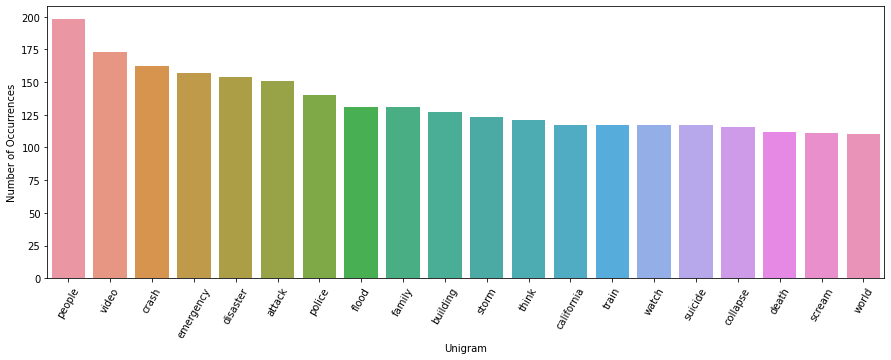

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_uni['unigram'], y=df_uni['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Unigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

In [26]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2),                      # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})',  # num chars >= 5
                          min_df=2).fit(corpus)                   # minimum required occurences of a word      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_3['text_cleaned'], 20)
df_bi = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

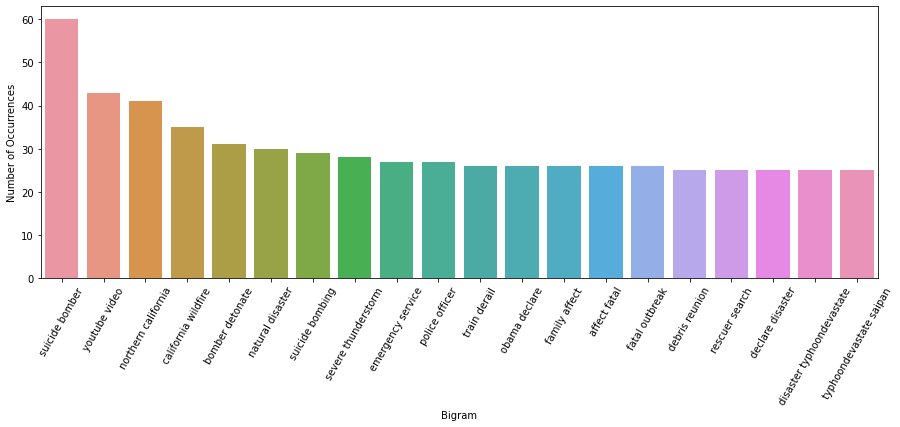

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_bi['bigram'], y=df_bi['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Bigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

In [28]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),                     # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})', # num chars >= 5
                          min_df=2).fit(corpus)                  # minimum required occurences of a word      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_3['text_cleaned'], 20)
df_tri = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

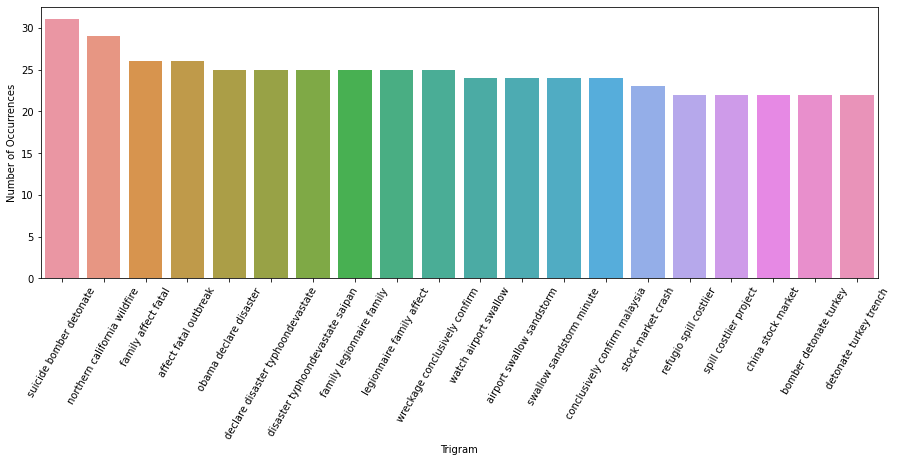

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_tri['trigram'], y=df_tri['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Trigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

### Word Embedding

In [30]:
def tokenize(sentence):
  sentence = str(sentence).replace("\n", " ")
  token = nlp(sentence)
  tokens = [w.text for w in token]
  # remove short tokens
  tokens = [t for t in tokens if len(t) > 4]
  return tokens

In [31]:
data = df_3['text_cleaned'].apply(tokenize)
def vocabulary(doc):        
    corpus = []
    for word in doc:
        corpus.append(word)
    return corpus

In [32]:
corpus = vocabulary(data)

In [33]:
def similar(model, word):
    return model.wv.most_similar(word) 

def embedding(model, word):
    return model.wv[word]

def similarity(model, word1, word2):
    return model.wv.similarity(word1, word2)

## CBOW Model

![](https://media.geeksforgeeks.org/wp-content/uploads/cbow-1.png)

In [34]:
# Create CBOW model
model_cbow = Word2Vec(corpus, min_count = 50)

In [35]:
print(model_cbow)

Word2Vec(vocab=98, size=100, alpha=0.025)


In [36]:
# summarize vocabulary
words = list(model_cbow.wv.vocab)
print(words)

['earthquake', 'forest', 'evacuation', 'people', 'wildfire', 'california', 'photo', 'smoke', 'school', 'update', 'flood', 'disaster', 'cause', 'emergency', 'happen', 'building', 'damage', 'crash', 'break', 'night', 'police', 'leave', 'black', 'train', 'truck', 'video', 'accident', 'great', 'report', 'thank', 'cross', 'injury', 'right', 'change', 'today', 'issue', 'scream', 'youtube', 'thing', 'debris', 'family', 'state', 'wreck', 'death', 'house', 'service', 'destroy', 'think', 'siren', 'weather', 'world', 'attack', 'survive', 'watch', 'start', 'movie', 'storm', 'collapse', 'military', 'japan', 'charge', 'northern', 'nuclear', 'suicide', 'bombing', 'obama', 'weapon', 'release', 'woman', 'atomic', 'flame', 'hostage', 'wound', 'drown', 'panic', 'hiroshima', 'rescue', 'explode', 'evacuate', 'confirm', 'content', 'water', 'casualty', 'collide', 'thunderstorm', 'fatal', 'crush', 'malaysia', 'deluge', 'demolish', 'derail', 'detonate', 'electrocute', 'reddit', 'fatality', 'obliterate', 'quara

In [37]:
similar(model_cbow, 'wildfire')

[('northern', 0.40688639879226685),
 ('service', 0.3198517858982086),
 ('quarantine', 0.292622447013855),
 ('youtube', 0.273812860250473),
 ('watch', 0.2644323706626892),
 ('truck', 0.2625896632671356),
 ('damage', 0.26238691806793213),
 ('reddit', 0.26208171248435974),
 ('content', 0.26128923892974854),
 ('suicide', 0.25786736607551575)]

In [38]:
embedding(model_cbow, 'wildfire')

array([-2.0306285e-03, -5.1437540e-04,  4.2220429e-03, -4.1691940e-03,
       -2.4469320e-03, -5.9821823e-04,  1.1954283e-03,  2.9620442e-03,
       -2.6224257e-04,  1.5931310e-03,  6.5458314e-03, -8.3030073e-04,
        4.6197278e-03, -4.9239285e-03, -1.6685429e-03,  2.6940199e-04,
        7.2614208e-04, -2.5216264e-03,  3.6570996e-03, -1.5168207e-03,
        1.2825290e-03, -1.1612931e-04, -2.0147983e-03, -6.3107157e-04,
        4.5393431e-03, -1.3794362e-03, -4.0243133e-03,  1.3102118e-03,
       -5.1831487e-03,  3.8174028e-03,  4.0962021e-03,  2.7388992e-04,
        3.8072423e-03,  3.8379468e-03,  3.2869908e-03,  3.3622270e-03,
       -9.2090422e-04,  1.2347989e-03, -2.1174946e-03, -3.3299529e-03,
       -9.2226005e-04,  9.5022994e-04, -6.2531390e-04,  1.6260872e-04,
       -3.3958231e-03,  8.8696368e-04,  1.3731578e-03,  3.0680827e-03,
       -4.5136240e-04, -1.9021560e-03, -4.8961723e-03, -4.5143939e-03,
        5.4184962e-03, -2.6376504e-03,  3.1744831e-03,  4.0065930e-03,
      

In [39]:
similarity(model_cbow, 'wildfire', "california")

0.2353266

In [40]:
X = model_cbow[model_cbow.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [41]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

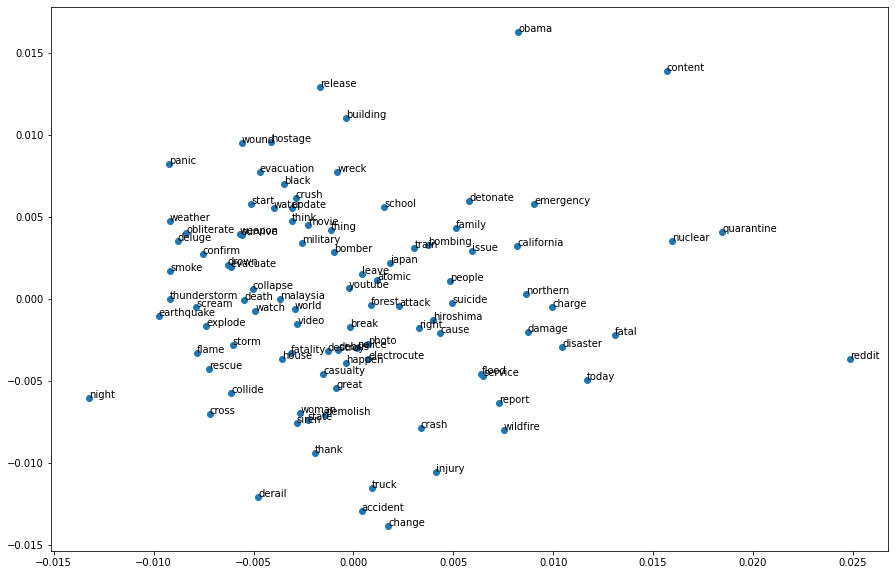

In [42]:
plt.figure(figsize=(15,10))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


## Skip Gram Model

![](https://media.geeksforgeeks.org/wp-content/uploads/skip_gram.png)

In [43]:
# Create Skip Gram model
model_sg = Word2Vec(corpus, min_count = 50, sg = 1)

In [44]:
print(model_sg)

Word2Vec(vocab=98, size=100, alpha=0.025)


In [45]:
# summarize vocabulary
words = list(model_sg.wv.vocab)
print(words)

['earthquake', 'forest', 'evacuation', 'people', 'wildfire', 'california', 'photo', 'smoke', 'school', 'update', 'flood', 'disaster', 'cause', 'emergency', 'happen', 'building', 'damage', 'crash', 'break', 'night', 'police', 'leave', 'black', 'train', 'truck', 'video', 'accident', 'great', 'report', 'thank', 'cross', 'injury', 'right', 'change', 'today', 'issue', 'scream', 'youtube', 'thing', 'debris', 'family', 'state', 'wreck', 'death', 'house', 'service', 'destroy', 'think', 'siren', 'weather', 'world', 'attack', 'survive', 'watch', 'start', 'movie', 'storm', 'collapse', 'military', 'japan', 'charge', 'northern', 'nuclear', 'suicide', 'bombing', 'obama', 'weapon', 'release', 'woman', 'atomic', 'flame', 'hostage', 'wound', 'drown', 'panic', 'hiroshima', 'rescue', 'explode', 'evacuate', 'confirm', 'content', 'water', 'casualty', 'collide', 'thunderstorm', 'fatal', 'crush', 'malaysia', 'deluge', 'demolish', 'derail', 'detonate', 'electrocute', 'reddit', 'fatality', 'obliterate', 'quara

In [46]:
similar(model_sg, 'wildfire')

[('northern', 0.4464225471019745),
 ('service', 0.3798676133155823),
 ('quarantine', 0.37446653842926025),
 ('content', 0.3591879606246948),
 ('reddit', 0.35676056146621704),
 ('suicide', 0.3404097259044647),
 ('fatal', 0.3183271884918213),
 ('damage', 0.3177078664302826),
 ('youtube', 0.31637269258499146),
 ('watch', 0.31616610288619995)]

In [47]:
embedding(model_sg, 'wildfire')

array([-2.1783842e-03, -7.4319512e-04,  4.3780445e-03, -4.6313209e-03,
       -1.9357705e-03, -1.0165318e-03,  1.2696822e-03,  3.1580881e-03,
        6.8274974e-05,  1.8123131e-03,  6.8904567e-03, -1.1550465e-03,
        4.4180183e-03, -4.9682404e-03, -1.7253879e-03,  8.1894985e-05,
        5.5690069e-04, -3.0025314e-03,  2.9684438e-03, -1.8052147e-03,
        9.1846753e-04,  1.4371057e-05, -1.9889106e-03, -1.1790874e-03,
        4.7124783e-03, -1.4105579e-03, -3.9466852e-03,  1.2510923e-03,
       -5.2009611e-03,  4.5029595e-03,  4.5689372e-03, -8.4702529e-05,
        3.4369356e-03,  4.5225578e-03,  2.9095141e-03,  3.8162065e-03,
       -1.0380052e-03,  1.1582276e-03, -1.6676752e-03, -3.1208529e-03,
       -7.3609198e-04,  9.8375545e-04, -9.9441037e-04,  1.3743124e-04,
       -3.7057716e-03,  4.6332541e-04,  1.1065493e-03,  2.9571780e-03,
       -4.6781817e-04, -1.9226731e-03, -4.8998622e-03, -4.4476036e-03,
        5.3367191e-03, -2.5911897e-03,  3.3653665e-03,  4.2711622e-03,
      

In [48]:
similarity(model_sg, 'wildfire', "california")

0.291111

In [49]:
X = model_sg[model_sg.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [50]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

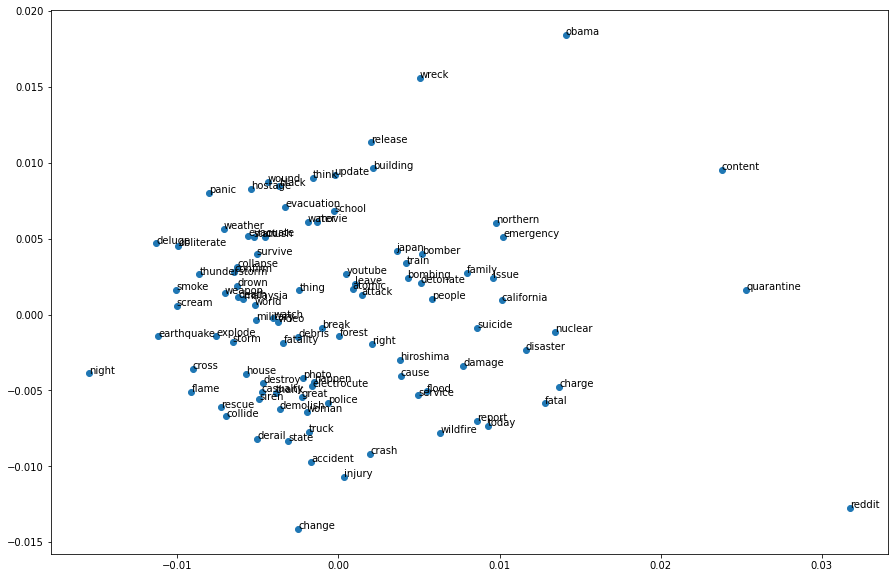

In [51]:
plt.figure(figsize=(15,10))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [52]:
# export data set
#from google.colab import files
#df_3.to_csv('df_train.csv')
#files.download('df_train.csv') 